# Regressão Linear - Predição da Idade

### importar bibliotecas

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### ler train.csv e test.csv

In [45]:
train = pd.read_csv('titanic/train.csv')

In [46]:
test = pd.read_csv('titanic/test.csv')

### transformar definir o Id do Passageiro como Index

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
train.set_index('PassengerId', inplace=True)

In [49]:
test.set_index('PassengerId', inplace=True)

### Verificar shape dos dois

In [50]:
train.shape, test.shape

((891, 11), (418, 10))

((891, 11), (418, 10))

### Criar coluna "Survived" no test set

In [51]:
test['Survived'] = np.nan

### Conferir shape novamente

In [52]:
train.shape, test.shape

((891, 11), (418, 11))

((891, 11), (418, 11))

### Concatenar train e test set

In [53]:
data = pd.concat([train, test], sort=False)

In [54]:
data.shape

(1309, 11)

(1309, 11)

### Traduzir colunas

In [55]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
data.columns = ['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaosConjuge', 'PaisFilhos', 'Bilhete',
       'Tarifa', 'Cabine', 'Embarque']


### Traduzir Sexo

In [57]:
data['Sexo'] = data['Sexo'].map({'male': 'homem', 'female': 'mulher'})

In [58]:
data.head()

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S


,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S


### Averiguar dados nulos

In [59]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuge       0
PaisFilhos          0
Bilhete             0
Tarifa              1
Cabine           1014
Embarque            2
dtype: int64

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuge       0
PaisFilhos          0
Bilhete             0
Tarifa              1
Cabine           1014
Embarque            2
dtype: int64

### Remover Cabine

In [60]:
data.drop('Cabine', axis=1, inplace=True)

### Checar dados nulos novamente

In [61]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           2
dtype: int64

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           2
dtype: int64

### Preencher dados nulos de "Embarque" com a moda

In [62]:
data['Embarque'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

array(['S', 'C', 'Q', nan], dtype=object)

In [63]:
moda = data['Embarque'].mode()[0]
moda

'S'

'S'

In [64]:
data['Embarque'].fillna(moda, inplace=True)

### Checar dados nulos novamente

In [65]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           0
dtype: int64

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           0
dtype: int64

### Preencher "Tarifa" faltando com a média

In [66]:
media = data['Tarifa'].mean()
media

33.2954792813456

33.2954792813456

In [67]:
data['Tarifa'].fillna(media, inplace=True)

### Checar dados nulos

In [68]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

### Verificar correlações

In [69]:
data.corr()

,Sobreviveu,Classe,Idade,IrmaosConjuge,PaisFilhos,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558477
Idade,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178229
IrmaosConjuge,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160224
PaisFilhos,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221522
Tarifa,0.257307,-0.558477,0.178229,0.160224,0.221522,1.000000


,Sobreviveu,Classe,Idade,IrmaosConjuge,PaisFilhos,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558477
Idade,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178229
IrmaosConjuge,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160224
PaisFilhos,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221522
Tarifa,0.257307,-0.558477,0.178229,0.160224,0.221522,1.000000


### Visualizar correlações com "heatmap"

<AxesSubplot:>

<AxesSubplot:>

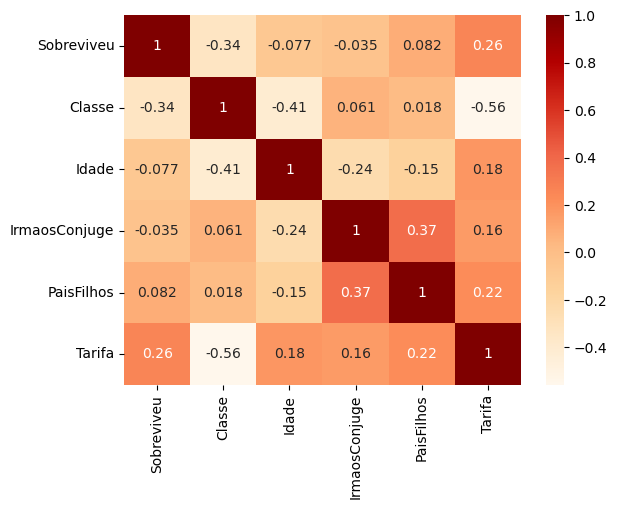

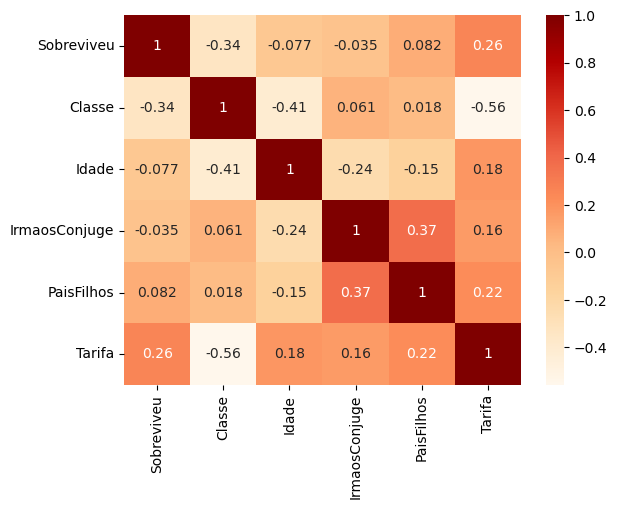

In [70]:
f , ax= plt.subplots(dpi=100) 
sns.heatmap(data.corr(), annot=True, cmap='OrRd')

### Remover coluna "Sobreviveu"
Aparentemente não tem muita correlação com Idade, e está faltando bastante dados

In [71]:
data.drop('Sobreviveu',axis =1, inplace=True)

### Checar dados nulos

In [72]:
data.isnull().sum()

Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

# Engenharia de Recursos I

### Criar coluna "Titulo" baseando-se na coluna "Nome"

In [73]:
data['Nome'].str.extract('([a-zA-Z]+)\.')

,0
PassengerId,
1,Mr
2,Mrs
3,Miss
4,Mrs
5,Mr
...,...
1305,Mr
1306,Dona
1307,Mr


,0
PassengerId,
1,Mr
2,Mrs
3,Miss
4,Mrs
5,Mr
...,...
1305,Mr
1306,Dona
1307,Mr


In [74]:
data['Nome']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Nome, Length: 1309, dtype: object

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Nome, Length: 1309, dtype: object

In [75]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [76]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [77]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [78]:
['Miss', 'Master', 'Mr', 'Mrs']

['Miss', 'Master', 'Mr', 'Mrs']

['Miss', 'Master', 'Mr', 'Mrs']

In [79]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in ['Miss', 'Master', 'Mr', 'Mrs'] else x)

In [80]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


### Traduzir "Titulos"

In [81]:
data.loc[data['Titulo']=='Master'].mean()

C:\Users\phill\AppData\Local\Temp\ipykernel_7812\2200331675.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.loc[data['Titulo']=='Master'].mean()
C:\Users\phill\AppData\Local\Temp\ipykernel_7812\2200331675.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.loc[data['Titulo']=='Master'].mean()


Classe            2.655738
Idade             5.482642
IrmaosConjuge     2.049180
PaisFilhos        1.377049
Tarifa           36.008195
dtype: float64

Classe            2.655738
Idade             5.482642
IrmaosConjuge     2.049180
PaisFilhos        1.377049
Tarifa           36.008195
dtype: float64

In [82]:
titulos_traduzidos = {
    'Master' : 'Menino',
    'Miss' : 'Solteira',
    'Mr': 'HomemAdulto',
    'Mrs' : 'Casada'
}

In [83]:
data['Titulo'].map(titulos_traduzidos)

PassengerId
1       HomemAdulto
2            Casada
3          Solteira
4            Casada
5       HomemAdulto
           ...     
1305    HomemAdulto
1306            NaN
1307    HomemAdulto
1308    HomemAdulto
1309         Menino
Name: Titulo, Length: 1309, dtype: object

PassengerId
1       HomemAdulto
2            Casada
3          Solteira
4            Casada
5       HomemAdulto
           ...     
1305    HomemAdulto
1306            NaN
1307    HomemAdulto
1308    HomemAdulto
1309         Menino
Name: Titulo, Length: 1309, dtype: object

In [84]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

In [85]:
data['Titulo']

PassengerId
1       HomemAdulto
2            Casada
3          Solteira
4            Casada
5       HomemAdulto
           ...     
1305    HomemAdulto
1306            NaN
1307    HomemAdulto
1308    HomemAdulto
1309         Menino
Name: Titulo, Length: 1309, dtype: object

PassengerId
1       HomemAdulto
2            Casada
3          Solteira
4            Casada
5       HomemAdulto
           ...     
1305    HomemAdulto
1306            NaN
1307    HomemAdulto
1308    HomemAdulto
1309         Menino
Name: Titulo, Length: 1309, dtype: object

### Averiguar informações do DataFrame

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Classe         1309 non-null   int64  
 1   Nome           1309 non-null   object 
 2   Sexo           1309 non-null   object 
 3   Idade          1046 non-null   float64
 4   IrmaosConjuge  1309 non-null   int64  
 5   PaisFilhos     1309 non-null   int64  
 6   Bilhete        1309 non-null   object 
 7   Tarifa         1309 non-null   float64
 8   Embarque       1309 non-null   object 
 9   Titulo         1275 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Classe         1309 non-null   int64  
 1   Nome           1309 non-null   object 
 2   Sexo         

### Remover "Bilhete" e "Nome"

In [87]:
data.drop(['Bilhete','Nome'],axis=1,inplace=True)

In [89]:
data.head

<bound method NDFrame.head of              Classe    Sexo  Idade  IrmaosConjuge  PaisFilhos    Tarifa  \
PassengerId                                                               
1                 3   homem   22.0              1           0    7.2500   
2                 1  mulher   38.0              1           0   71.2833   
3                 3  mulher   26.0              0           0    7.9250   
4                 1  mulher   35.0              1           0   53.1000   
5                 3   homem   35.0              0           0    8.0500   
...             ...     ...    ...            ...         ...       ...   
1305              3   homem    NaN              0           0    8.0500   
1306              1  mulher   39.0              0           0  108.9000   
1307              3   homem   38.5              0           0    7.2500   
1308              3   homem    NaN              0           0    8.0500   
1309              3   homem    NaN              1           1   22.358

<bound method NDFrame.head of              Classe    Sexo  Idade  IrmaosConjuge  PaisFilhos    Tarifa  \
PassengerId                                                               
1                 3   homem   22.0              1           0    7.2500   
2                 1  mulher   38.0              1           0   71.2833   
3                 3  mulher   26.0              0           0    7.9250   
4                 1  mulher   35.0              1           0   53.1000   
5                 3   homem   35.0              0           0    8.0500   
...             ...     ...    ...            ...         ...       ...   
1305              3   homem    NaN              0           0    8.0500   
1306              1  mulher   39.0              0           0  108.9000   
1307              3   homem   38.5              0           0    7.2500   
1308              3   homem    NaN              0           0    8.0500   
1309              3   homem    NaN              1           1   22.358

# Engenharia de Recursos II

### Estudar possibilidade de identificar "meninas" similar aos "meninos"
Através da combinação: "solteira" e está com "pais"

In [95]:
solteiras_com_pais = data.loc[(data['Titulo'] == 'Solteira') & (data['PaisFilhos'] >=1)]
solteiras_com_pais

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
11,3,mulher,4.00,1,1,16.7000,S,Solteira
25,3,mulher,8.00,3,1,21.0750,S,Solteira
44,2,mulher,3.00,1,2,41.5792,C,Solteira
59,2,mulher,5.00,1,2,27.7500,S,Solteira
69,3,mulher,17.00,4,2,7.9250,S,Solteira
...,...,...,...,...,...,...,...,...
1218,2,mulher,12.00,2,1,39.0000,S,Solteira
1246,3,mulher,0.17,1,2,20.5750,S,Solteira
1277,2,mulher,24.00,1,2,65.0000,S,Solteira


,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
11,3,mulher,4.00,1,1,16.7000,S,Solteira
25,3,mulher,8.00,3,1,21.0750,S,Solteira
44,2,mulher,3.00,1,2,41.5792,C,Solteira
59,2,mulher,5.00,1,2,27.7500,S,Solteira
69,3,mulher,17.00,4,2,7.9250,S,Solteira
...,...,...,...,...,...,...,...,...
1218,2,mulher,12.00,2,1,39.0000,S,Solteira
1246,3,mulher,0.17,1,2,20.5750,S,Solteira
1277,2,mulher,24.00,1,2,65.0000,S,Solteira


### idade média de "meninas solteiras acompanhadas dos pais"

In [96]:
solteiras_com_pais['Idade'].mean()

12.178815789473683

12.178815789473683

### verificar distribuição da idade

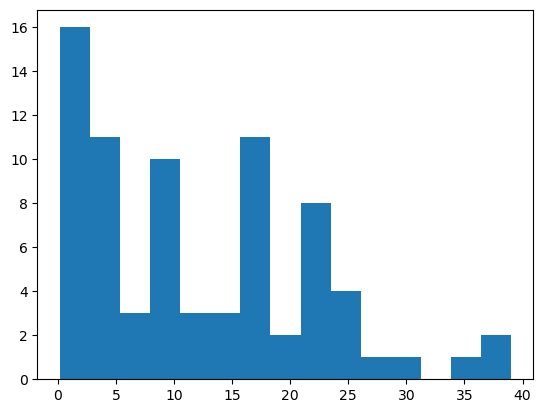

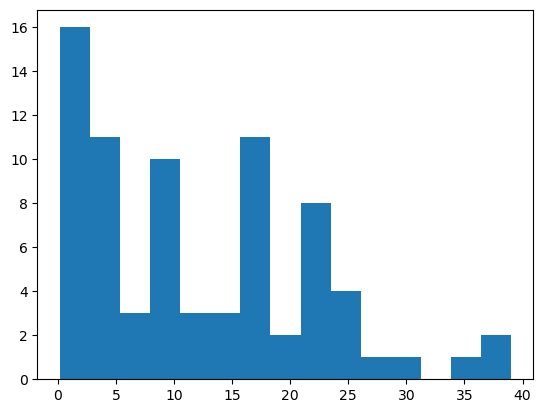

In [99]:
plt.hist(solteiras_com_pais['Idade'], bins=15)
plt.show()

### Média de mulheres "solteiras"

In [105]:
data.loc[data['Titulo']=='Solteira']['Idade'].mean()
mulheres_solteiras = data.loc[data['Titulo']=='Solteira']

### Distribuição das idades de mulheres "solteiras"

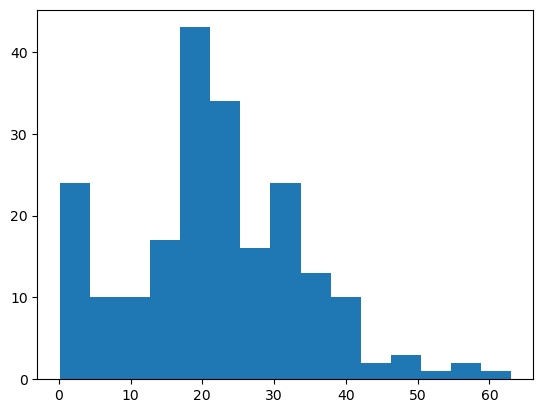

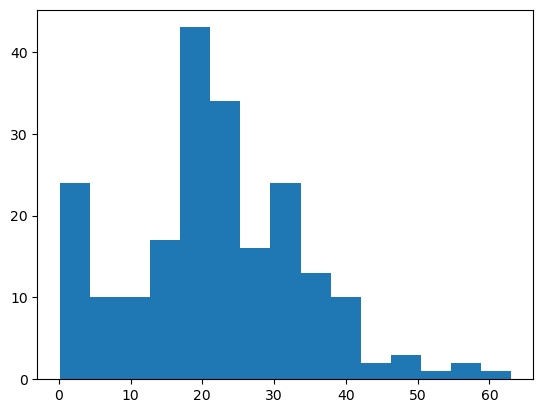

In [106]:
plt.hist(mulheres_solteiras['Idade'], bins=15)
plt.show()

### Média de idade de mulheres "casadas"

### Distribuição das idades de mulheres "casadas"

### Adicionar coluna "solteira com pais"

### Transformar recursos categóricos em "dummies"

### Separar train e test para idades
* treinar com dados não nulos
* aplicar modelo em dados nulos

## Definir X e y para treinar o modelo

### Importar modelo regressivo

### Instanciar modelo

### Importar train_test_split para preparar para treino

### Dividir 70% para treinar, 30% para testar

### Treinar modelo

### Fazer predição

### Importar mean_squared_error (erro quadrado médio)

### Averiguar score

### Averiguar rmse

### Visualizar resíduos em scatterplot

<a name="tarifa"></a>

### Aplicar modelo nos dados nulos

### Criar coluna Idade contendos as predições

### Averiguar shapes

### Concatenar dados

### Criar DataFrame contendo "IdPassageiro" e "Idade"

### Salvar CSV com idade completa